# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import urllib

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities2.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["deg"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=grand%20river%20south%20east
City not found. Skipping...
Processing Record 2 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=butaritari
Processing Record 3 of Set 1 | cabatuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=cabatuan
Processing Record 4 of Set 1 | oga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=oga
Processing Record 5 of Set 1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=sao%20joao%20da%20barra
Processing Record 6 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 4 of Set 2 | tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=tabou
Processing Record 5 of Set 2 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=tura
Processing Record 6 of Set 2 | pervomayskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=pervomayskoye
Processing Record 7 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=mar%20del%20plata
Processing Record 8 of Set 2 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=salalah
Processing Record 9 of Set 2 | cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=cayenne
Processing Record 10 of Set 2 | muravlenko
http://api.openweathermap.org/data/2.5/

Processing Record 7 of Set 3 | alotau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=alotau
City not found. Skipping...
Processing Record 8 of Set 3 | barra patuca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=barra%20patuca
Processing Record 9 of Set 3 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=ilulissat
Processing Record 10 of Set 3 | xingtai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=xingtai
Processing Record 11 of Set 3 | dawson creek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=dawson%20creek
City not found. Skipping...
Processing Record 12 of Set 3 | estelle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=estelle
Processing Reco

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=codrington
Processing Record 12 of Set 4 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 4 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=barrow
Processing Record 14 of Set 4 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=hilo
Processing Record 15 of Set 4 | salur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=salur
Processing Record 16 of Set 4 | kemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=kemi
Processing Record 17 of Set 4 | lundazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e

Processing Record 14 of Set 5 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=mareeba
Processing Record 15 of Set 5 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=bengkulu
City not found. Skipping...
Processing Record 16 of Set 5 | medicine hat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=medicine%20hat
Processing Record 17 of Set 5 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=hofn
Processing Record 18 of Set 5 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=qasigiannguit
Processing Record 19 of Set 5 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=te%20anau
Processing Record 20 of Set 5 | port augusta

Processing Record 18 of Set 6 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=evensk
Processing Record 19 of Set 6 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=saldanha
Processing Record 20 of Set 6 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=asau
City not found. Skipping...
Processing Record 21 of Set 6 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=souillac
Processing Record 22 of Set 6 | aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=aden
Processing Record 23 of Set 6 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=sioux%20lookout
Processing Record 24 of Set 6 | antofagasta
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=olafsvik
City not found. Skipping...
Processing Record 22 of Set 7 | springfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=springfield
Processing Record 23 of Set 7 | bhinmal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=bhinmal
Processing Record 24 of Set 7 | morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=morros
Processing Record 25 of Set 7 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=fortuna
Processing Record 26 of Set 7 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=kahului
Processing Record 27 of Set 7 | del rio
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 26 of Set 8 | luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=luanda
Processing Record 27 of Set 8 | esso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=esso
Processing Record 28 of Set 8 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=komsomolskiy
Processing Record 29 of Set 8 | boueni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=boueni
Processing Record 30 of Set 8 | halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=halalo
City not found. Skipping...
Processing Record 31 of Set 8 | vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=vila
Processing Record 32 of Set 8 | lahat
http://api.openweathermap.org/data/2

Processing Record 30 of Set 9 | staryy nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=staryy%20nadym
Processing Record 31 of Set 9 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=biak
Processing Record 32 of Set 9 | innisfail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=innisfail
Processing Record 33 of Set 9 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=derzhavinsk
Processing Record 34 of Set 9 | toulepleu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=toulepleu
City not found. Skipping...
Processing Record 35 of Set 9 | yongzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=yongzhou
Processing Record 36 of Set 9 | hami
http:

Processing Record 36 of Set 10 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=laguna
Processing Record 37 of Set 10 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=fare
Processing Record 38 of Set 10 | shu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=shu
Processing Record 39 of Set 10 | mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=mahon
Processing Record 40 of Set 10 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=huarmey
Processing Record 41 of Set 10 | mynay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=mynay
Processing Record 42 of Set 10 | kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e

Processing Record 39 of Set 11 | maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=maningrida
Processing Record 40 of Set 11 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=klaksvik
Processing Record 41 of Set 11 | saquarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=saquarema
Processing Record 42 of Set 11 | englehart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=englehart
Processing Record 43 of Set 11 | slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=slave%20lake
Processing Record 44 of Set 11 | mahanoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=mahanoro
Processing Record 45 of Set 11 | chagda
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=shingu
Processing Record 46 of Set 12 | belle fourche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=belle%20fourche
Processing Record 47 of Set 12 | buga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=buga
Processing Record 48 of Set 12 | marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=marystown
Processing Record 49 of Set 12 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=henties%20bay
Processing Record 0 of Set 13 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e94744268503e2746a35fa130d874f&q=buala
Processing Record 1 of Set 13 | puerto cabezas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame(city_data)

lat = city_df["Lat"]
lng = city_df["Lng"]
max_temp = city_df["Max Temp"]
humidity=city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

city_df.to_csv(output_data_file,index_label="city_ID")

city_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
city_df

City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0           butaritari   3.07  172.79     84.06        80         100   
1             cabatuan  16.95  121.67     71.46        86         100   
2                  oga  46.46   10.35     36.00        67           5   
3    sao joao da barra -21.64  -41.05     91.40        55          40   
4           bredasdorp -34.53   20.04     69.80        52         100   
..                 ...    ...     ...       ...       ...         ...   
560              ilebo  -4.33   20.59     85.80        55          98   
561      krasnokamensk  50.10  118.04      9.90        96          97   
562         anakapalle  17.69   83.00     75.20        78          75   
563            tautira -17.73 -149.15     77.00        88          20   
564          road town  18.42  -64.62     80.60        74          75   

     Wind Speed Country        Date  
0            80      KI  1578327810  
1           268      PH  1578327810  
2           337      IT  1578327810  
3            53      BR  1578327649  
4           220      ZA  1578327610  
..          ...     ...         ...  
560          41      CD  1578327858  
561         351      RU  1578327858  
562          60      IN  1578327858  
563         110      PF  1578327858  
564          60      VG  1578327858  

[565 rows x 9 columns]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

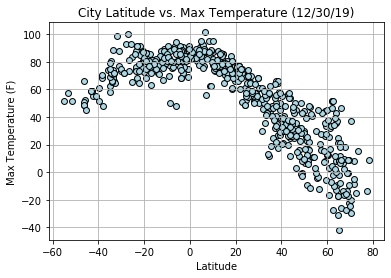

In [6]:

plt.scatter(city_df["Lat"],city_df["Max Temp"],facecolors="lightblue",edgecolors="black" ,marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Max Temperature (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

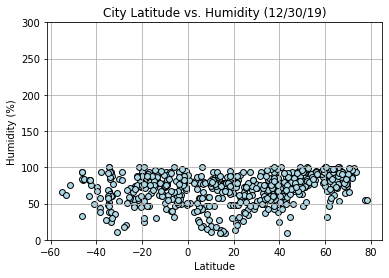

In [7]:

plt.scatter(city_df["Lat"],city_df["Humidity"],facecolors="lightblue",edgecolors="black",marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Humidity (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 300)
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

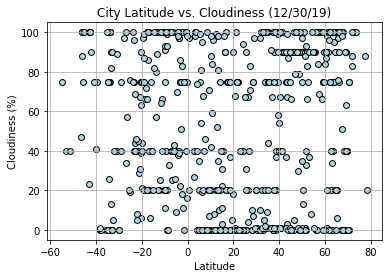

In [8]:

plt.scatter(city_df["Lat"],city_df["Cloudiness"],facecolors="lightblue",edgecolors="black",marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Cloudiness (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

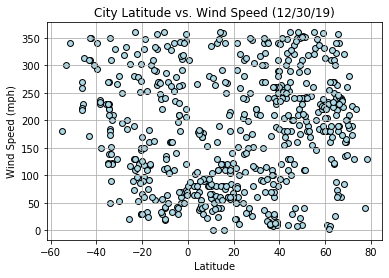

In [9]:

plt.scatter(city_df["Lat"],city_df["Wind Speed"],facecolors="lightblue",edgecolors="black",marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Wind Speed (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig4.png")
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(plt, x, y, color) :
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, intercept + slope*x, color)

In [11]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
nh_city_df = city_df[city_df["Lat"]>=0].copy()
#print("Northern Hemisphere")
#print(nh_city_df.count())
sh_city_df = city_df[city_df["Lat"]<0].copy()
#print("Southern Hemisphere")
#print(sh_city_df.count())

#slope, intercept, r_value, p_value, std_err = linregress(nh_city_df["Lat"], nh_city_df["Max Temp"])
#print(slope)
#print(intercept)
#print(r_value)
#print(p_value)
#print(std_err)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

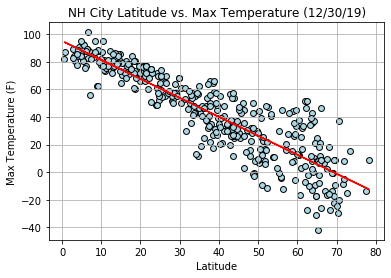

In [12]:
plt.scatter(nh_city_df["Lat"],nh_city_df["Max Temp"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(nh_city_df["Lat"], intercept + slope*nh_city_df["Lat"], 'r')
plot_linear_regression(plt, nh_city_df["Lat"], nh_city_df["Max Temp"], 'r')
plt.title("NH City Latitude vs. Max Temperature (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

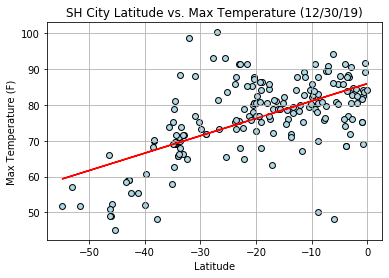

In [13]:
plt.scatter(sh_city_df["Lat"],sh_city_df["Max Temp"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(sh_city_df["Lat"], intercept + slope*sh_city_df["Lat"], 'r')
plot_linear_regression(plt, sh_city_df["Lat"], sh_city_df["Max Temp"], 'r')
plt.title("SH City Latitude vs. Max Temperature (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

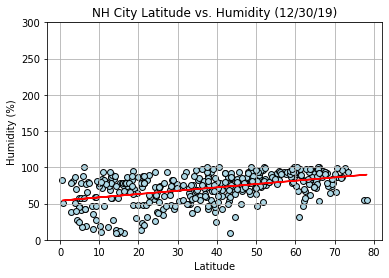

In [14]:
plt.scatter(nh_city_df["Lat"],nh_city_df["Humidity"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(nh_city_df["Lat"], intercept + slope*nh_city_df["Lat"], 'r')
plot_linear_regression(plt, nh_city_df["Lat"], nh_city_df["Humidity"], 'r')
plt.title("NH City Latitude vs. Humidity (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

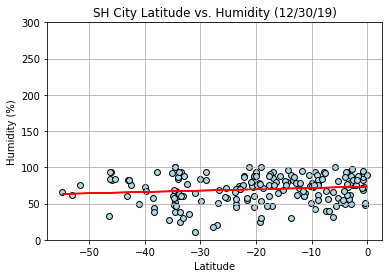

In [15]:
plt.scatter(sh_city_df["Lat"],sh_city_df["Humidity"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(sh_city_df["Lat"], intercept + slope*sh_city_df["Lat"], 'r')
plot_linear_regression(plt, sh_city_df["Lat"], sh_city_df["Humidity"], 'r')
plt.title("SH City Latitude vs. Humidity (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 300)
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

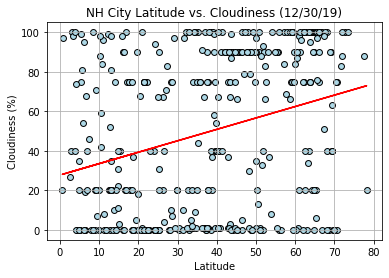

In [16]:
plt.scatter(nh_city_df["Lat"],nh_city_df["Cloudiness"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(nh_city_df["Lat"], intercept + slope*nh_city_df["Lat"], 'r')
plot_linear_regression(plt, nh_city_df["Lat"], nh_city_df["Cloudiness"], 'r')
plt.title("NH City Latitude vs. Cloudiness (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

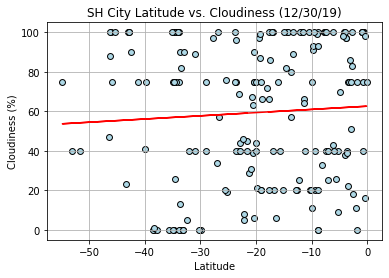

In [17]:
plt.scatter(sh_city_df["Lat"],sh_city_df["Cloudiness"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(sh_city_df["Lat"], intercept + slope*sh_city_df["Lat"], 'r')
plot_linear_regression(plt, sh_city_df["Lat"], sh_city_df["Cloudiness"], 'r')
plt.title("SH City Latitude vs. Cloudiness (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

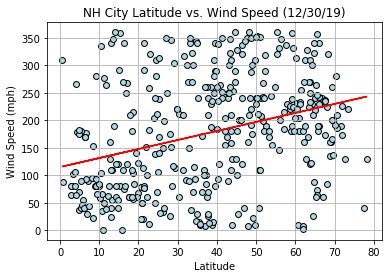

In [18]:
plt.scatter(nh_city_df["Lat"],nh_city_df["Wind Speed"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(nh_city_df["Lat"], intercept + slope*nh_city_df["Lat"], 'r')
plot_linear_regression(plt, nh_city_df["Lat"], nh_city_df["Wind Speed"], 'r')
plt.title("NH City Latitude vs. Wind Speed (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

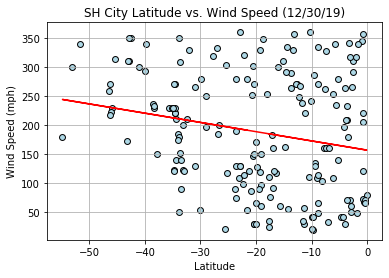

In [19]:
plt.scatter(sh_city_df["Lat"],sh_city_df["Wind Speed"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
#plt.plot(sh_city_df["Lat"], intercept + slope*sh_city_df["Lat"], 'r')
plot_linear_regression(plt, sh_city_df["Lat"], sh_city_df["Wind Speed"], 'r')
plt.title("SH City Latitude vs. Wind Speed (12/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig12.png")
plt.show()